In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Get the data
Get images of bears.

## Initialise

Initialise the environment for the FastAI book

In [10]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import namespaces

In [ ]:
from fastcore.all import *
from fastbook import *
from fastai import *

In [60]:
from fastai.vision.widgets import *

## Perform search on DuckDuckGo

In [20]:
results = search_images_ddg('grizzly bear')
ims = results
len(ims)

200

## Download the first image

In [21]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

## Open the image

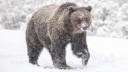

In [22]:
im = Image.open(dest)
im.to_thumb(128,128)

## Download all images
Images downloaded according to their search term and put into folders

In [24]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [43]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

not exists
hello
hello
hello


## Inspect folder

In [44]:
fns = get_image_files(path)
fns

(#541) [Path('bears/black/f0dc4de1-cd90-4e1c-b7ec-5e6f1c66317c.jpg'),Path('bears/black/c4de7587-74cb-41aa-abe7-9cd07f7b5ecb.jpeg'),Path('bears/black/088d6a2c-e95d-4253-a962-0d23a99d7ea7.jpg'),Path('bears/black/6f9d31b2-ea69-4243-9b9a-deb479a3e814.jpg'),Path('bears/black/db682dfa-2969-4365-a988-168830921d08.jpg'),Path('bears/black/9217a6ef-bc01-484c-9f38-0f4f029d212a.jpg'),Path('bears/black/91b2a5db-28ad-474e-8628-410c32035bb2.jpg'),Path('bears/black/fbf685a6-0857-43a4-b8a6-15ebc8f9317a.jpg'),Path('bears/black/9d2f373e-1fd5-430b-891a-33a255699a32.jpg'),Path('bears/black/35a26968-a71c-49f1-b651-d0a6ccb097a8.jpg'),Path('bears/black/52d06a3a-4f48-4401-8fa2-7a863c3ac985.jpg'),Path('bears/black/c63d7f59-56a1-4e48-8b29-428d8c6c08e8.jpg'),Path('bears/black/988c9900-fdda-4d68-a13f-a3bd79552ec0.jpg'),Path('bears/black/9991ee33-3bde-4d29-906f-2ef020c8dd77.jpg'),Path('bears/black/d034cfc3-0e00-47a4-bd7c-718a33abd4de.jpg'),Path('bears/black/2998d2b6-15d7-4df5-b303-bcc096cfea25.jpg'),Path('bears/bla

## Remove failed images
Find and then remove (using `unlink`)

In [45]:
failed = verify_images(fns)
failed

(#46) [Path('bears/black/b3360963-091e-43fd-aa2d-a65c5e3e679a.jpg'),Path('bears/black/c18be093-9dfc-448d-a34e-d7c2e456a667.jpg'),Path('bears/black/c986bc4a-95a3-4754-aa99-2e54cb8406f5.JPG'),Path('bears/black/19287967-c2dc-42ff-99d2-bc195733ebe5.jpg'),Path('bears/black/3a0bd594-2456-493e-bc66-545b9a882562.jpg'),Path('bears/grizzly/7e17cb3a-4c3f-495d-bdbf-11a8f41517ae.JPG'),Path('bears/grizzly/5f8cbadc-0dc0-410b-9d6a-3b40d51969d9.jpg'),Path('bears/grizzly/b090f2e1-2db4-4462-b6eb-3d8f55061979.png'),Path('bears/grizzly/6a9c7b88-fb5b-443c-ac40-afb8613707c1.jpg'),Path('bears/grizzly/c6e3f49e-d939-4925-af52-8e334b1f98ae.jpg'),Path('bears/grizzly/94669dae-1019-4697-9b7a-48ef96e0bdc9.jpg'),Path('bears/grizzly/61bb63d0-11f2-4eb7-b50b-4f0d4a2bb06e.jpg'),Path('bears/grizzly/851ded3c-3592-4d38-93c8-1b69855152cd.jpg'),Path('bears/grizzly/889536dd-8998-4111-9dd4-61ba3f6bce59.JPG'),Path('bears/grizzly/b2764c13-df81-47d5-a2fe-5e76d8c1fbef.jpg'),Path('bears/teddy/d7d75224-3a3b-45cb-99ec-56a780946fb6.jpg

In [46]:
failed.map(Path.unlink)

(#46) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [ ]:
## Train and then clean

In [47]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [48]:
dls = bears.dataloaders(path)

At this point we only have a mapping between our search terms and the data.

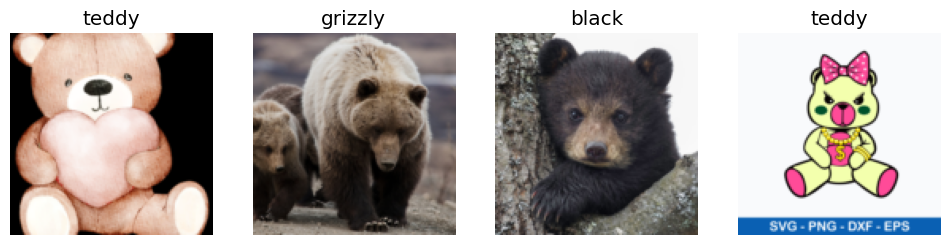

In [49]:
dls.valid.show_batch(max_n=4, nrows=1)

## Train

In [50]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

## Fine-tune

In [51]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 174MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.232926,0.237004,0.070707,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.296774,0.255124,0.050505,01:54
1,0.289826,0.304799,0.060606,02:00
2,0.209798,0.332733,0.050505,02:11
3,0.168665,0.316218,0.050505,01:55


## Classification matrix

Useful for when a dataset has discrete/categorized data/labels.

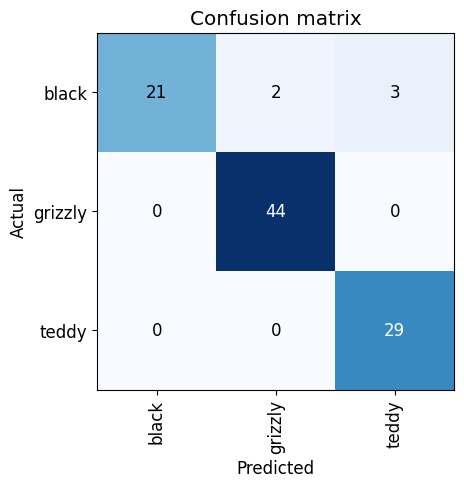

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Looking at the above, relying on ML to predict teddy bears will cause significant injuries in 3 out of 99 cases.

Using this, we can display the top losses.

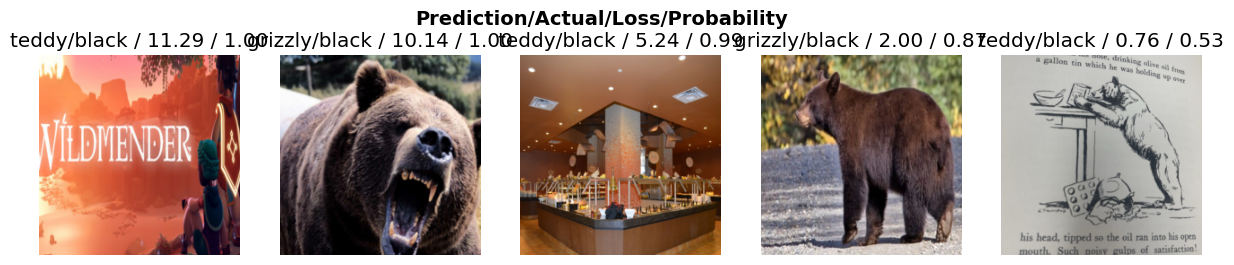

In [63]:
interp.plot_top_losses(5, nrows=1)

Problems will arise if:
* Prediction is incorrect but confidence is high (low loss, high probability)
* Prediction is correct but confidence is low (high loss, low probability)

## Clean

Clean incorrectly identified items.

In [64]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [66]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.34.0
ipykernel        : 6.17.1
ipywidgets       : 7.8.5
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.12.5
jupyterlab       : 3.6.8
nbclient         : 0.5.13
nbconvert        : 6.4.5
nbformat         : 5.10.4
notebook         : 6.5.4
qtconsole        : 5.6.1
traitlets        : 5.7.1
